# Experiement: First Round | 19%

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("../data/cardio_19.csv")

df.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0  72899  17769       1     167    70.0    150     90            2     1   
1  67122  15243       2     170    70.0    165     80            1     1   
2  61439  22598       1     161    90.0    120     80            1     1   
3  70752  18838       1     163    73.0    150     90            1     1   
4  24081  23435       1     151    54.0    120     80            3     3   

   smoke  alco  active  cardio  
0      0     0       1       1  
1      0     0       1       1  
2      0     0       1       1  
3      0     0       1       1  
4      0     0       1       1

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43029 entries, 0 to 43028
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           43029 non-null  int64  
 1   age          43029 non-null  int64  
 2   gender       43029 non-null  int64  
 3   height       43029 non-null  int64  
 4   weight       43029 non-null  float64
 5   ap_hi        43029 non-null  int64  
 6   ap_lo        43029 non-null  int64  
 7   cholesterol  43029 non-null  int64  
 8   gluc         43029 non-null  int64  
 9   smoke        43029 non-null  int64  
 10  alco         43029 non-null  int64  
 11  active       43029 non-null  int64  
 12  cardio       43029 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 4.3 MB


In [3]:
pd.value_counts(df['cardio']).plot.bar()
plt.title('Cardio Vascular dataset (19%)')
plt.xlabel('1=heart disease, 0=no heart disease')
plt.ylabel('Samples in dataset')
df['cardio'].value_counts()

0    34679
1     8350
Name: cardio, dtype: int64

Balance ratio: 8350/43029 = 0,1940551

# Train/Test split

The random_state is 42.

In [4]:
# Importing the splitter, classification model, and the metric
from sklearn.model_selection import train_test_split
#Splitting the data with stratification
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['cardio']), df['cardio'], test_size = 0.2, stratify = df['cardio'], random_state = 42)

In [5]:
X_train.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
29430  61151  19034       1     151    71.0    140     90            1     1   
26146  51705  21383       1     170    78.0    120     80            1     1   
22136  40160  19763       1     161    73.0     80     60            2     1   
11898  11189  14606       1     162    59.0    120     80            1     1   
28202  57654  15810       2     170    74.0    130    100            1     1   

       smoke  alco  active  
29430      0     0       0  
26146      0     0       1  
22136      0     0       0  
11898      0     0       1  
28202      0     0       1

# Logistic Regression with raw dataset

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(classification_report(y_train, classifier.predict(X_train)))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89     27743
           1       0.57      0.06      0.11      6680

    accuracy                           0.81     34423
   macro avg       0.69      0.52      0.50     34423
weighted avg       0.77      0.81      0.74     34423



In [7]:
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      6936
           1       0.46      0.06      0.10      1670

    accuracy                           0.80      8606
   macro avg       0.64      0.52      0.50      8606
weighted avg       0.74      0.80      0.74      8606



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.744


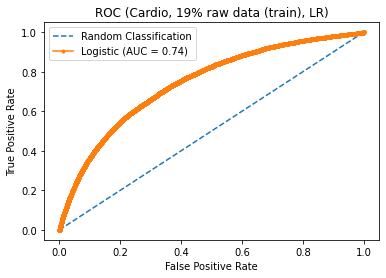

In [8]:
# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = classifier.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 19% raw data (train), LR)')
# show the legend
pyplot.legend()
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.726


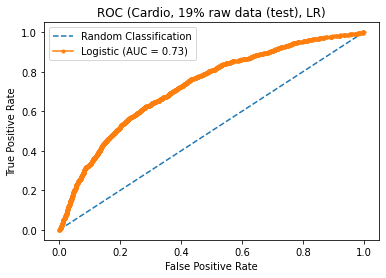

In [9]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 19% raw data (test), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# SVM with raw dataset

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC(probability=True))
clf.fit(X_train, y_train)
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89     27743
           1       0.62      0.10      0.18      6680

    accuracy                           0.81     34423
   macro avg       0.72      0.54      0.54     34423
weighted avg       0.78      0.81      0.76     34423



In [11]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      6936
           1       0.53      0.09      0.15      1670

    accuracy                           0.81      8606
   macro avg       0.67      0.53      0.52      8606
weighted avg       0.76      0.81      0.75      8606



No Skill: ROC AUC=0.500
SVM: ROC AUC=0.779


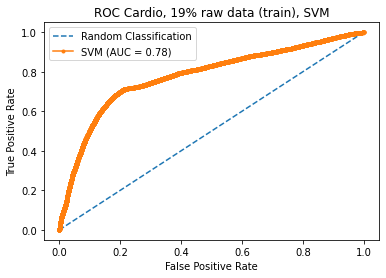

In [12]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 19% raw data (train), SVM')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.736


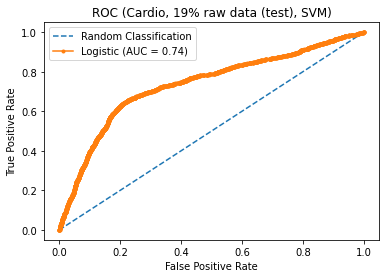

In [13]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 19% raw data (test), SVM)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# XGBoost with raw dataset

In [14]:
import xgboost as xgb
import pickle
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [15]:
%%time

model = xgb.XGBClassifier(max_depth=4,
                        subsample=0.9,
                        objective='binary:logistic',
                        n_estimators=200,
                        learning_rate = 0.1)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train.values.ravel(), early_stopping_rounds=10, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.17346	validation_0-logloss:0.64522	validation_1-error:0.17976	validation_1-logloss:0.64590
[1]	validation_0-error:0.17328	validation_0-logloss:0.60589	validation_1-error:0.17906	validation_1-logloss:0.60714
[2]	validation_0-error:0.17250	validation_0-logloss:0.57358	validation_1-error:0.17836	validation_1-logloss:0.57522
[3]	validation_0-error:0.17119	validation_0-logloss:0.54652	validation_1-error:0.17720	validation_1-logloss:0.54880
[4]	validation_0-error:0.17250	validation_0-logloss:0.52384	validation_1-error:0.17790	validation_1-logloss:0.52660
[5]	validation_0-error:0.17096	validation_0-logloss:0.50453	validation_1-error:0.17778	validation_1-logloss:0.50792
[6]	validation_0-error:0.17041	validation_0-logloss:0.48822	validation_1-error:0.17732	validation_1-logloss:0.49215
[7]	validation_0-error:0.17056	validation_0-logloss:0.47421	validation_1-error:0.17790	validation_1-logloss:0.47846
[8]	validation_0-error:0.17079	validation_0-logloss:0.46226	validation_1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [16]:
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     27743
           1       0.60      0.42      0.50      6680

    accuracy                           0.83     34423
   macro avg       0.74      0.68      0.70     34423
weighted avg       0.82      0.83      0.82     34423



In [17]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      6936
           1       0.56      0.40      0.47      1670

    accuracy                           0.82      8606
   macro avg       0.71      0.66      0.68      8606
weighted avg       0.81      0.82      0.81      8606



No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.818


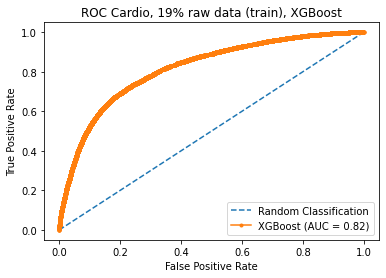

In [18]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 19% raw data (train), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.791


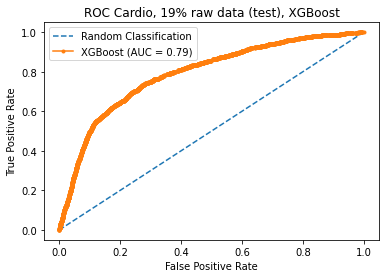

In [19]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 19% raw data (test), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# Data augmentation

In the following part, the data gets perfectly balanced, by applying SMOTE, TVAE, and CTGAN to the raw dataset. The minority class is oversampled, by only creating samples with cardio=1. Afterwards, the machine learning algorithms run with the balaned datasets.

In [20]:
df_train = X_train
df_train['cardio'] = y_train

In [21]:
df_train.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
29430  61151  19034       1     151    71.0    140     90            1     1   
26146  51705  21383       1     170    78.0    120     80            1     1   
22136  40160  19763       1     161    73.0     80     60            2     1   
11898  11189  14606       1     162    59.0    120     80            1     1   
28202  57654  15810       2     170    74.0    130    100            1     1   

       smoke  alco  active  cardio  
29430      0     0       0       0  
26146      0     0       1       0  
22136      0     0       0       0  
11898      0     0       1       0  
28202      0     0       1       0


### SMOTE

In [22]:
#Importing SMOTE
from imblearn.over_sampling import SMOTE
#Oversampling the data
smote = SMOTE(random_state = 101)
X, y = smote.fit_resample(df_train[['id','age','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active']], df_train['cardio'])
#Creating a new Oversampling Data Frame
df_oversampler = pd.DataFrame(X, columns = ['id','age','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active'])
df_oversampler_y = pd.DataFrame(y, columns = ['cardio'])
pd.value_counts(df_oversampler_y['cardio']).plot.bar()
plt.title('Cardio Vascular dataset (19%)')
plt.xlabel('1=heart disease, 0=no heart disease')
plt.ylabel('Samples in dataset')
df_oversampler_y['cardio'].value_counts()

1    27743
0    27743
Name: cardio, dtype: int64

In [23]:
X_train = df_oversampler
y_train = df_oversampler_y

## Logistic Regression with data from SMOTE

In [24]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(classification_report(y_train, classifier.predict(X_train)))

              precision    recall  f1-score   support

           0       0.70      0.73      0.72     27743
           1       0.72      0.69      0.71     27743

    accuracy                           0.71     55486
   macro avg       0.71      0.71      0.71     55486
weighted avg       0.71      0.71      0.71     55486



In [25]:
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      6936
           1       0.36      0.65      0.46      1670

    accuracy                           0.71      8606
   macro avg       0.63      0.69      0.63      8606
weighted avg       0.79      0.71      0.73      8606



In [26]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = classifier.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 19% SMOTE (train), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.776


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.742


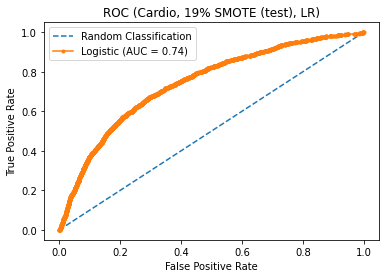

In [27]:
# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 19% SMOTE (test), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## SVM with data from SMOTE

In [28]:
clf = make_pipeline(StandardScaler(), SVC(probability=True))
clf.fit(X_train, y_train)
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77     27743
           1       0.77      0.75      0.76     27743

    accuracy                           0.77     55486
   macro avg       0.77      0.77      0.77     55486
weighted avg       0.77      0.77      0.77     55486



In [29]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82      6936
           1       0.37      0.56      0.44      1670

    accuracy                           0.73      8606
   macro avg       0.62      0.66      0.63      8606
weighted avg       0.78      0.73      0.75      8606



No Skill: ROC AUC=0.500
SVM: ROC AUC=0.839


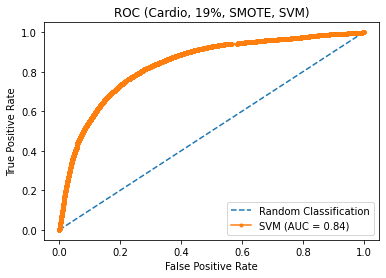

In [30]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 19%, SMOTE, SVM)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
SVM: ROC AUC=0.740


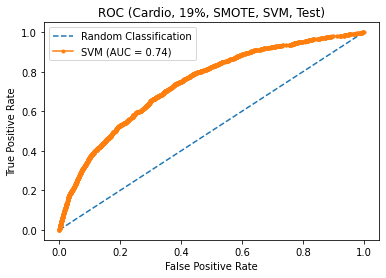

In [31]:
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 19%, SMOTE, SVM, Test)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## XGBoost with data from SMOTE

In [32]:
%%time

model = xgb.XGBClassifier(max_depth=4,
                        subsample=0.9,
                        objective='binary:logistic',
                        n_estimators=200,
                        learning_rate = 0.1)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train.values.ravel(), early_stopping_rounds=10, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.21052	validation_0-logloss:0.65595	validation_1-error:0.23588	validation_1-logloss:0.66197
[1]	validation_0-error:0.20895	validation_0-logloss:0.62350	validation_1-error:0.23135	validation_1-logloss:0.63498
[2]	validation_0-error:0.20256	validation_0-logloss:0.59695	validation_1-error:0.21532	validation_1-logloss:0.61282
[3]	validation_0-error:0.20888	validation_0-logloss:0.57569	validation_1-error:0.22624	validation_1-logloss:0.59515
[4]	validation_0-error:0.20248	validation_0-logloss:0.55624	validation_1-error:0.21020	validation_1-logloss:0.57903
[5]	validation_0-error:0.20072	validation_0-logloss:0.53703	validation_1-error:0.20683	validation_1-logloss:0.56408
[6]	validation_0-error:0.19859	validation_0-logloss:0.52211	validation_1-error:0.20706	validation_1-logloss:0.55276
[7]	validation_0-error:0.20333	validation_0-logloss:0.51114	validation_1-error:0.22194	validation_1-logloss:0.54378
[8]	validation_0-error:0.20302	validation_0-logloss:0.50191	validation_1

[71]	validation_0-error:0.15701	validation_0-logloss:0.36006	validation_1-error:0.20369	validation_1-logloss:0.45563
[72]	validation_0-error:0.15685	validation_0-logloss:0.35968	validation_1-error:0.20369	validation_1-logloss:0.45558
[73]	validation_0-error:0.15671	validation_0-logloss:0.35939	validation_1-error:0.20346	validation_1-logloss:0.45570
[74]	validation_0-error:0.15611	validation_0-logloss:0.35877	validation_1-error:0.20323	validation_1-logloss:0.45541
[75]	validation_0-error:0.15575	validation_0-logloss:0.35811	validation_1-error:0.20369	validation_1-logloss:0.45524
[76]	validation_0-error:0.15528	validation_0-logloss:0.35729	validation_1-error:0.20335	validation_1-logloss:0.45495
[77]	validation_0-error:0.15526	validation_0-logloss:0.35658	validation_1-error:0.20335	validation_1-logloss:0.45466
[78]	validation_0-error:0.15514	validation_0-logloss:0.35624	validation_1-error:0.20358	validation_1-logloss:0.45460
[79]	validation_0-error:0.15505	validation_0-logloss:0.35577	val

[141]	validation_0-error:0.14297	validation_0-logloss:0.33015	validation_1-error:0.20091	validation_1-logloss:0.44711
[142]	validation_0-error:0.14261	validation_0-logloss:0.32983	validation_1-error:0.20079	validation_1-logloss:0.44696
[143]	validation_0-error:0.14263	validation_0-logloss:0.32972	validation_1-error:0.20056	validation_1-logloss:0.44699
[144]	validation_0-error:0.14254	validation_0-logloss:0.32961	validation_1-error:0.20067	validation_1-logloss:0.44697
[145]	validation_0-error:0.14227	validation_0-logloss:0.32921	validation_1-error:0.20044	validation_1-logloss:0.44676
[146]	validation_0-error:0.14209	validation_0-logloss:0.32896	validation_1-error:0.20033	validation_1-logloss:0.44667
[147]	validation_0-error:0.14150	validation_0-logloss:0.32802	validation_1-error:0.20033	validation_1-logloss:0.44631
[148]	validation_0-error:0.14122	validation_0-logloss:0.32758	validation_1-error:0.20044	validation_1-logloss:0.44622
[149]	validation_0-error:0.14059	validation_0-logloss:0.

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [33]:
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87     27743
           1       0.89      0.84      0.86     27743

    accuracy                           0.87     55486
   macro avg       0.87      0.87      0.87     55486
weighted avg       0.87      0.87      0.87     55486



In [34]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88      6936
           1       0.49      0.46      0.47      1670

    accuracy                           0.80      8606
   macro avg       0.68      0.67      0.68      8606
weighted avg       0.80      0.80      0.80      8606



No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.941


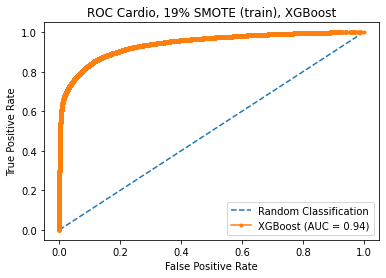

In [35]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 19% SMOTE (train), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.775


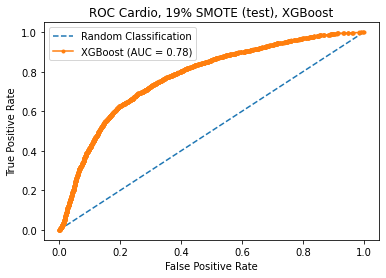

In [36]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 19% SMOTE (test), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## Data augmentation with TVAE 

In [37]:
df_train['cardio'].value_counts()

0    27743
1     6680
Name: cardio, dtype: int64

In [38]:
from sdv.tabular import TVAE
tvae = TVAE()

tvae.fit(df_train)
# Once trained generate samples
samples = tvae.sample(2000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df = pd.concat([df_train,samples])
tvae_result_df['cardio'].value_counts()

0    27743
1     6695
Name: cardio, dtype: int64

In [39]:
tvae = TVAE()

tvae.fit(tvae_result_df)
# Once trained generate samples
samples = tvae.sample(10000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df1 = pd.concat([tvae_result_df,samples])
tvae_result_df1['cardio'].value_counts()

0    27743
1     9186
Name: cardio, dtype: int64

In [40]:
tvae = TVAE()

tvae.fit(tvae_result_df1)
# Once trained generate samples
samples = tvae.sample(10000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df2 = pd.concat([tvae_result_df1,samples])
tvae_result_df2['cardio'].value_counts()

0    27743
1    12950
Name: cardio, dtype: int64

In [41]:
tvae = TVAE()

tvae.fit(tvae_result_df2)
# Once trained generate samples
samples = tvae.sample(13000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df3 = pd.concat([tvae_result_df2,samples])
tvae_result_df3['cardio'].value_counts()

0    27743
1    13551
Name: cardio, dtype: int64

In [42]:
tvae = TVAE()

tvae.fit(tvae_result_df3)
# Once trained generate samples
samples = tvae.sample(15000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df4 = pd.concat([tvae_result_df3,samples])
tvae_result_df4['cardio'].value_counts()

0    27743
1    17505
Name: cardio, dtype: int64

In [43]:
tvae = TVAE()

tvae.fit(tvae_result_df4)
# Once trained generate samples
samples = tvae.sample(17000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df5 = pd.concat([tvae_result_df4,samples])
tvae_result_df5['cardio'].value_counts()

0    27743
1    21158
Name: cardio, dtype: int64

In [44]:
tvae = TVAE()

tvae.fit(tvae_result_df5)
# Once trained generate samples
samples = tvae.sample(20000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df6 = pd.concat([tvae_result_df5,samples])
tvae_result_df6['cardio'].value_counts()

1    28581
0    27743
Name: cardio, dtype: int64

In [45]:
tvae = TVAE()

tvae.fit(tvae_result_df6)
# Once trained generate samples
samples = tvae.sample(22000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df7 = pd.concat([tvae_result_df6,samples])
tvae_result_df7['cardio'].value_counts()

1    28650
0    27743
Name: cardio, dtype: int64

In [46]:
tvae_result_df_1 = tvae_result_df7[tvae_result_df7['cardio'] == 1]
tvae_result_df_1['cardio'].value_counts()

1    28650
Name: cardio, dtype: int64

In [47]:
tvae_result_df_0 = tvae_result_df7[tvae_result_df7['cardio'] == 0]
tvae_result_df_0['cardio'].value_counts()

0    27743
Name: cardio, dtype: int64

In [48]:
train_df_1_bal = tvae_result_df_1.sample(n = 27743)

In [49]:
train_df_balanced = train_df_1_bal.append(tvae_result_df_0)

1    27743
0    27743
Name: cardio, dtype: int64

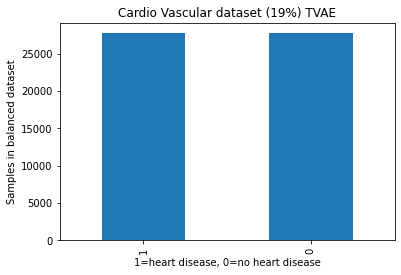

In [50]:
pd.value_counts(train_df_balanced['cardio']).plot.bar()
plt.title('Cardio Vascular dataset (19%) TVAE')
plt.xlabel('1=heart disease, 0=no heart disease')
plt.ylabel('Samples in balanced dataset')
train_df_balanced['cardio'].value_counts()

In [51]:
X_train = train_df_balanced.drop(['cardio'], axis=1)
y_train = train_df_balanced['cardio']

### Logistic Regression with TVAE balanced data

In [52]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(classification_report(y_train, classifier.predict(X_train)))

              precision    recall  f1-score   support

           0       0.70      0.65      0.67     27743
           1       0.67      0.71      0.69     27743

    accuracy                           0.68     55486
   macro avg       0.68      0.68      0.68     55486
weighted avg       0.68      0.68      0.68     55486



In [53]:
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.64      0.73      6936
           1       0.27      0.55      0.36      1670

    accuracy                           0.62      8606
   macro avg       0.56      0.60      0.55      8606
weighted avg       0.74      0.62      0.66      8606



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.728


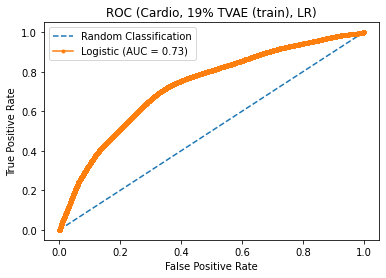

In [54]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = classifier.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 19% TVAE (train), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.639


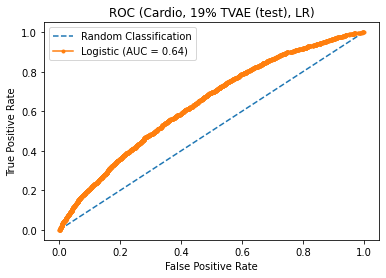

In [55]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 19% TVAE (test), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## SVM with TVAE balanced data

In [56]:
clf = make_pipeline(StandardScaler(), SVC(probability=True))
clf.fit(X_train, y_train)
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.81      0.98      0.88     27743
           1       0.97      0.77      0.86     27743

    accuracy                           0.87     55486
   macro avg       0.89      0.87      0.87     55486
weighted avg       0.89      0.87      0.87     55486



In [57]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      6936
           1       0.51      0.13      0.20      1670

    accuracy                           0.81      8606
   macro avg       0.66      0.55      0.55      8606
weighted avg       0.76      0.81      0.76      8606



No Skill: ROC AUC=0.500
SVM: ROC AUC=0.942


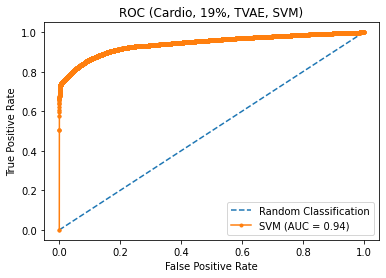

In [58]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 19%, TVAE, SVM)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
SVM: ROC AUC=0.742


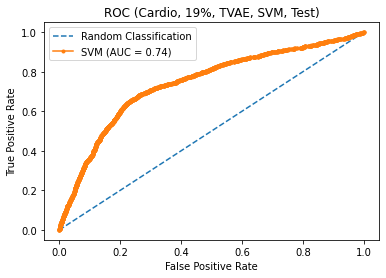

In [59]:
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 19%, TVAE, SVM, Test)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# XGBoost with TVAE balanced data

In [60]:
%%time

model = xgb.XGBClassifier(max_depth=4,
                        subsample=0.9,
                        objective='binary:logistic',
                        n_estimators=200,
                        learning_rate = 0.1)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train.values.ravel(), early_stopping_rounds=10, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.12115	validation_0-logloss:0.63230	validation_1-error:0.17999	validation_1-logloss:0.65012
[1]	validation_0-error:0.12115	validation_0-logloss:0.58201	validation_1-error:0.17999	validation_1-logloss:0.61396
[2]	validation_0-error:0.12115	validation_0-logloss:0.54033	validation_1-error:0.17999	validation_1-logloss:0.58405
[3]	validation_0-error:0.12115	validation_0-logloss:0.50499	validation_1-error:0.17999	validation_1-logloss:0.55918
[4]	validation_0-error:0.12133	validation_0-logloss:0.47550	validation_1-error:0.17999	validation_1-logloss:0.53793
[5]	validation_0-error:0.12131	validation_0-logloss:0.45019	validation_1-error:0.17999	validation_1-logloss:0.52003
[6]	validation_0-error:0.12131	validation_0-logloss:0.42848	validation_1-error:0.17999	validation_1-logloss:0.50493
[7]	validation_0-error:0.12016	validation_0-logloss:0.40957	validation_1-error:0.18011	validation_1-logloss:0.49182
[8]	validation_0-error:0.12014	validation_0-logloss:0.39335	validation_1

[71]	validation_0-error:0.11403	validation_0-logloss:0.25341	validation_1-error:0.18057	validation_1-logloss:0.40369
[72]	validation_0-error:0.11390	validation_0-logloss:0.25329	validation_1-error:0.18011	validation_1-logloss:0.40365
[73]	validation_0-error:0.11387	validation_0-logloss:0.25311	validation_1-error:0.18022	validation_1-logloss:0.40360
[74]	validation_0-error:0.11329	validation_0-logloss:0.25277	validation_1-error:0.18011	validation_1-logloss:0.40353
[75]	validation_0-error:0.11296	validation_0-logloss:0.25226	validation_1-error:0.18046	validation_1-logloss:0.40349
[76]	validation_0-error:0.11291	validation_0-logloss:0.25211	validation_1-error:0.17953	validation_1-logloss:0.40344
[77]	validation_0-error:0.11277	validation_0-logloss:0.25174	validation_1-error:0.17999	validation_1-logloss:0.40315
[78]	validation_0-error:0.11286	validation_0-logloss:0.25163	validation_1-error:0.18011	validation_1-logloss:0.40311
[79]	validation_0-error:0.11289	validation_0-logloss:0.25148	val

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [61]:
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89     27743
           1       0.92      0.85      0.89     27743

    accuracy                           0.89     55486
   macro avg       0.89      0.89      0.89     55486
weighted avg       0.89      0.89      0.89     55486



In [62]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      6936
           1       0.55      0.40      0.46      1670

    accuracy                           0.82      8606
   macro avg       0.71      0.66      0.68      8606
weighted avg       0.80      0.82      0.81      8606



In [63]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 19% TVAE (train), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.953


No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.789


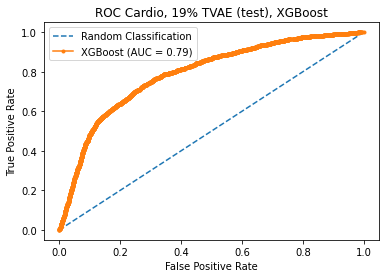

In [64]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 19% TVAE (test), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## CTGAN for balancing the dataset

In [65]:
train_df_small = df_train.sample(n = 2000)

0    1606
1     394
Name: cardio, dtype: int64

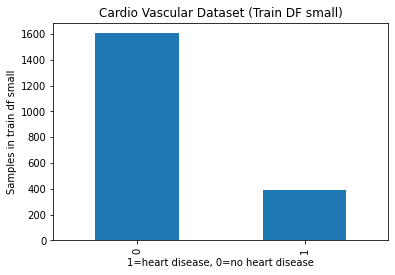

In [66]:
pd.value_counts(train_df_small['cardio']).plot.bar()
plt.title('Cardio Vascular Dataset (Train DF small)')
plt.xlabel('1=heart disease, 0=no heart disease')
plt.ylabel('Samples in train df small')
train_df_small['cardio'].value_counts()

In [68]:
from ctgan import CTGANSynthesizer
ctgan = CTGANSynthesizer()

ctgan.fit(train_df_small, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples = ctgan.sample(500)
samples = samples[samples['cardio'] ==1.0]
samples['cardio'].value_counts()

1    72
Name: cardio, dtype: int64

In [69]:
df_train['cardio'].value_counts()

0    27743
1     6680
Name: cardio, dtype: int64

In [70]:
ctgan_1 = df_train[df_train['cardio'] == 1]
ctgan_0 = df_train[df_train['cardio'] == 0]
ctgan_0_sm = ctgan_0.sample(n = 9000)
df_train_sm = samples.append(ctgan_0_sm)
df_train_sm = df_train_sm.append(ctgan_1)
df_train_sm['cardio'].value_counts()

0    9000
1    6752
Name: cardio, dtype: int64

In [71]:
ctgan = CTGANSynthesizer()

ctgan.fit(df_train_sm, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples1 = ctgan.sample(7000)
samples1 = samples1[samples1['cardio'] ==1.0]
samples1['cardio'].value_counts()

1    3009
Name: cardio, dtype: int64

In [72]:
df_train_sm1 = df_train_sm.append(samples1)
ctgan = CTGANSynthesizer()

ctgan.fit(df_train_sm1, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples2 = ctgan.sample(10000)
samples2 = samples2[samples2['cardio'] ==1.0]
samples2['cardio'].value_counts()

1    4092
Name: cardio, dtype: int64

In [73]:
df_train_med1 = df_train_sm1.append(samples2) 
ctgan_0_med = ctgan_0.sample(n = 16000)
df_train_med = ctgan_0_med.append(df_train_med1)
df_train_med['cardio'].value_counts()

0    25000
1    13853
Name: cardio, dtype: int64

In [74]:
ctgan = CTGANSynthesizer()

ctgan.fit(df_train_med, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples3 = ctgan.sample(20000)
samples3 = samples3[samples3['cardio'] ==1.0]
samples3['cardio'].value_counts()

1    6447
Name: cardio, dtype: int64

In [75]:
df_train_med_1 = df_train_med.append(samples3) 

ctgan = CTGANSynthesizer()

ctgan.fit(df_train_med_1, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples4 = ctgan.sample(20000)
samples4 = samples4[samples4['cardio'] ==1.0]
samples4['cardio'].value_counts()

1    8728
Name: cardio, dtype: int64

In [76]:
df_train_med_2 = df_train_med_1.append(samples4) 
df_train_med_2['cardio'].value_counts()

1    29028
0    25000
Name: cardio, dtype: int64

In [77]:
ctgan_1 = df_train_med_2[df_train_med_2['cardio'] == 1]
ctgan_0 = df_train[df_train['cardio'] == 0]

In [78]:
train_df_1_bal = ctgan_1.sample(n = 27743)

In [79]:
df_train_bal = train_df_1_bal.append(ctgan_0)

In [80]:
df_train_bal['cardio'].value_counts()

1    27743
0    27743
Name: cardio, dtype: int64

In [81]:
X_train = df_train_bal.drop(['cardio'], axis=1)
y_train = df_train_bal['cardio']

### Logistic Regression with CTGAN data

In [82]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(classification_report(y_train, classifier.predict(X_train)))

              precision    recall  f1-score   support

           0       0.69      0.73      0.71     27743
           1       0.71      0.68      0.70     27743

    accuracy                           0.70     55486
   macro avg       0.70      0.70      0.70     55486
weighted avg       0.70      0.70      0.70     55486



In [83]:
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.72      0.80      6936
           1       0.35      0.63      0.45      1670

    accuracy                           0.70      8606
   macro avg       0.62      0.67      0.62      8606
weighted avg       0.79      0.70      0.73      8606



In [84]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = classifier.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 19% CTGAN (train), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.767


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.737


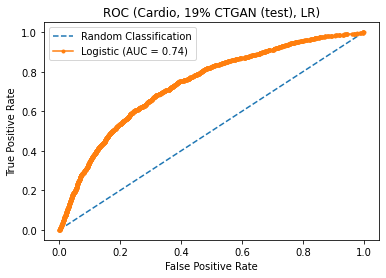

In [85]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 19% CTGAN (test), LR)')
# show the legend
pyplot.legend()
# show the plot

### SVM with CTGAN data

In [86]:
clf = make_pipeline(StandardScaler(), SVC(probability=True))
clf.fit(X_train, y_train)
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.75      0.80      0.77     27743
           1       0.78      0.73      0.75     27743

    accuracy                           0.76     55486
   macro avg       0.76      0.76      0.76     55486
weighted avg       0.76      0.76      0.76     55486



In [87]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.79      0.84      6936
           1       0.40      0.59      0.48      1670

    accuracy                           0.75      8606
   macro avg       0.65      0.69      0.66      8606
weighted avg       0.80      0.75      0.77      8606



No Skill: ROC AUC=0.500
SVM: ROC AUC=0.834


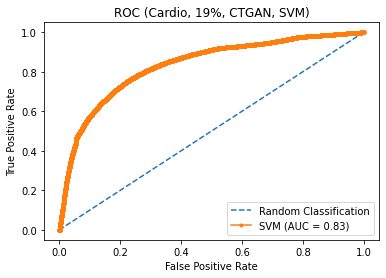

In [88]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 19%, CTGAN, SVM)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [89]:
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 19%, CTGAN, SVM, Test)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
SVM: ROC AUC=0.751


### XGBoost with CTGAN data

In [90]:
%%time

model = xgb.XGBClassifier(max_depth=4,
                        subsample=0.9,
                        objective='binary:logistic',
                        n_estimators=200,
                        learning_rate = 0.1)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train.values.ravel(), early_stopping_rounds=10, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.20275	validation_0-logloss:0.65368	validation_1-error:0.22484	validation_1-logloss:0.66118
[1]	validation_0-error:0.19864	validation_0-logloss:0.62103	validation_1-error:0.20846	validation_1-logloss:0.63444
[2]	validation_0-error:0.19596	validation_0-logloss:0.59393	validation_1-error:0.20079	validation_1-logloss:0.61191
[3]	validation_0-error:0.18158	validation_0-logloss:0.56562	validation_1-error:0.20137	validation_1-logloss:0.58993
[4]	validation_0-error:0.17969	validation_0-logloss:0.54716	validation_1-error:0.20125	validation_1-logloss:0.57468
[5]	validation_0-error:0.17976	validation_0-logloss:0.53096	validation_1-error:0.20160	validation_1-logloss:0.56224
[6]	validation_0-error:0.18289	validation_0-logloss:0.51010	validation_1-error:0.19870	validation_1-logloss:0.54736
[7]	validation_0-error:0.18289	validation_0-logloss:0.49656	validation_1-error:0.19870	validation_1-logloss:0.53721
[8]	validation_0-error:0.16974	validation_0-logloss:0.48155	validation_1

[71]	validation_0-error:0.12967	validation_0-logloss:0.31007	validation_1-error:0.19963	validation_1-logloss:0.43991
[72]	validation_0-error:0.12944	validation_0-logloss:0.30906	validation_1-error:0.19905	validation_1-logloss:0.43973
[73]	validation_0-error:0.12937	validation_0-logloss:0.30862	validation_1-error:0.19905	validation_1-logloss:0.43960
[74]	validation_0-error:0.12929	validation_0-logloss:0.30828	validation_1-error:0.19893	validation_1-logloss:0.43957
[75]	validation_0-error:0.12913	validation_0-logloss:0.30797	validation_1-error:0.19893	validation_1-logloss:0.43939
[76]	validation_0-error:0.12908	validation_0-logloss:0.30758	validation_1-error:0.19881	validation_1-logloss:0.43929
[77]	validation_0-error:0.12931	validation_0-logloss:0.30702	validation_1-error:0.19893	validation_1-logloss:0.43928
[78]	validation_0-error:0.12917	validation_0-logloss:0.30669	validation_1-error:0.19905	validation_1-logloss:0.43922
[79]	validation_0-error:0.12899	validation_0-logloss:0.30649	val

[141]	validation_0-error:0.12277	validation_0-logloss:0.28944	validation_1-error:0.19905	validation_1-logloss:0.43751
[142]	validation_0-error:0.12264	validation_0-logloss:0.28912	validation_1-error:0.19928	validation_1-logloss:0.43744
CPU times: user 11.9 s, sys: 266 ms, total: 12.2 s
Wall time: 31.8 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [91]:
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88     27743
           1       0.89      0.86      0.87     27743

    accuracy                           0.88     55486
   macro avg       0.88      0.88      0.88     55486
weighted avg       0.88      0.88      0.88     55486



In [92]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      6936
           1       0.48      0.44      0.46      1670

    accuracy                           0.80      8606
   macro avg       0.68      0.66      0.67      8606
weighted avg       0.79      0.80      0.80      8606



No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.945


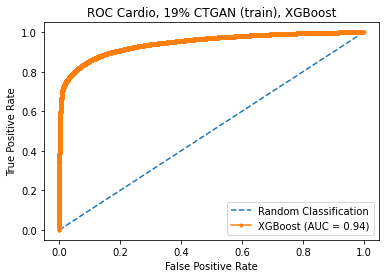

In [93]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 19% CTGAN (train), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.771


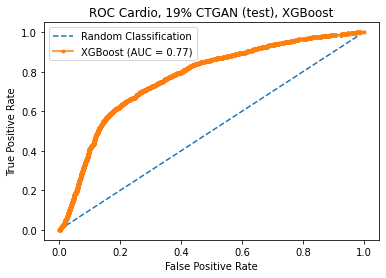

In [94]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 19% CTGAN (test), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()